**Data Loading**

In [4]:
variety_languages = ["en", "es", "ar", "zh", "ru", "hi", "sw", "tr", "ja", "fr", "ms", "ko"]
"""
Variety Languages:
en - English
es - Spanish
ar - Arabic
zh - Chinese
ru - Russian 
hi - Hindi
sw - Swahili
tr - Turkish
ja - Japanese
fr - French
ms - Malay/Indonesian
ko - Korean
"""
germanic_romance_langs = ["af", "de", "en", "es", "fr", "it", "nl", "pt"]

complete_langs = ["af", "ar", "bg", "bn", "de", "el", "en", "es", "et", "eu", "fa", "fi", "fr", "he", "hi", "hu", "id", "it", "ja", "jv", \
                  "ka", "kk", "ko", "ml", "mr", "ms", "my", "nl", "pt", "ru", "sw", "ta", "te", "th", "tl", "tr", "ur", "vi", "yo", "zh"]
lang_dist = {
    "zh": 5000,
    "fr": 5000,
    "pt": 5000,
    "ar": 5000,
    "ru": 5000,
    "ja": 5000,
    "it": 5000,
    "id": 5000,
    "hu": 5000,
    "th": 5000,
    "he": 5000,
    "fi": 5000,
    "nl": 5000,
    "fa": 5000,
    "tr": 5000,
    "es": 5000,
    "en": 5000,
    "el": 5000,
    "de": 5000,
    "vi": 5000,
    "bg": 5000,
    "ko": 5000,
    "et": 4000,
    "ka": 3500,
    "eu": 3500,
    "ms": 2500,
    "ur": 2500,
    "ta": 2000,
    "ml": 1500,
    "tl": 1500,
    "bn": 1500,
    "mr": 1000,
    "hi": 1000,
    "af": 1000,
    "kk": 500,
    "sw": 500,
    "te": 500,
    "my": 100,
    "jv": 100,
    "yo": 100
}
from src.data.panx_loader import PANX_dataloader

dataloader = PANX_dataloader(langs=complete_langs, nrows=10000000)
df_test = dataloader.load_data()
print(df_test['lang'].value_counts().to_dict())

Processing Language Data: 100%|██████████| 40/40 [01:54<00:00,  2.86s/it]

Concatenated all data together


{'zh': 40000, 'fr': 40000, 'pt': 40000, 'ar': 40000, 'ru': 40000, 'ja': 40000, 'it': 40000, 'id': 40000, 'hu': 40000, 'th': 40000, 'he': 40000, 'fi': 40000, 'nl': 40000, 'fa': 40000, 'tr': 40000, 'es': 40000, 'en': 40000, 'el': 40000, 'de': 40000, 'vi': 40000, 'bg': 40000, 'ko': 40000, 'et': 35000, 'ka': 30000, 'eu': 30000, 'ms': 22000, 'ur': 22000, 'ta': 17000, 'ml': 12000, 'tl': 12000, 'bn': 12000, 'mr': 7000, 'hi': 7000, 'af': 7000, 'kk': 3000, 'sw': 3000, 'te': 3000, 'my': 300, 'jv': 300, 'yo': 300}


In [2]:
len(df_test)

137300

In [17]:
from collections import Counter
all_tags = [x for tag_list in df_test['ner_tags'].to_list() for x in tag_list]
print(Counter(all_tags))
print(len(all_tags))

Counter({0: 7611231, 4: 1226261, 2: 993635, 6: 768630, 5: 535577, 1: 462818, 3: 436617})
12034769


NameError: name 'df_test' is not defined

In [18]:
7611231/12034769

0.6324368170257361

<Axes: >

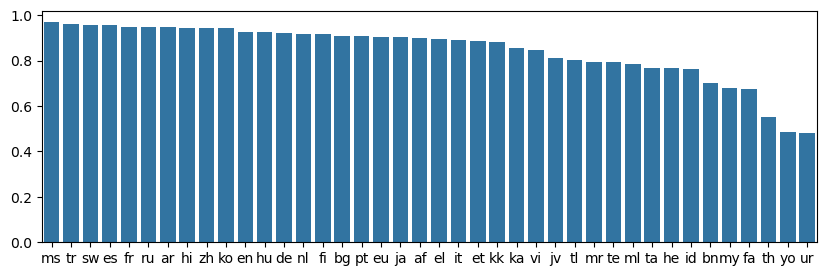

In [2]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 3))

with open('../src/data/model_performance/var_model_accuracy.json') as f:
    var_rom_accuracy = json.load(f)

keys = list(var_rom_accuracy.keys())
values = list(var_rom_accuracy.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

sns.barplot(x=list(sorted_dict.keys()), y=list(sorted_dict.values()))

In [4]:
import json
with open('src/data/model_performance/var_model_accuracy.json') as f:
    var_rom_accuracy = json.load(f)

var_rom_accuracy

{'af': 0.9016193151473999,
 'ar': 0.9475671648979187,
 'bg': 0.9096574783325195,
 'bn': 0.7035135626792908,
 'de': 0.9233652353286743,
 'el': 0.895377516746521,
 'en': 0.9264163970947266,
 'es': 0.9551864862442017,
 'et': 0.8878942131996155,
 'eu': 0.9040717482566833,
 'fa': 0.676748514175415,
 'fi': 0.9183438420295715,
 'fr': 0.9497711658477783,
 'he': 0.7684919834136963,
 'hi': 0.9450414776802063,
 'hu': 0.9244530200958252,
 'id': 0.7616013884544373,
 'it': 0.8931920528411865,
 'ja': 0.9036403894424438,
 'jv': 0.8137880563735962,
 'ka': 0.8566244840621948,
 'kk': 0.8809781074523926,
 'ko': 0.9430087804794312,
 'ml': 0.7863863110542297,
 'mr': 0.7933176755905151,
 'ms': 0.969239354133606,
 'my': 0.6789369583129883,
 'nl': 0.9183833003044128,
 'pt': 0.907105565071106,
 'ru': 0.9493586421012878,
 'sw': 0.9584344625473022,
 'ta': 0.7696848511695862,
 'te': 0.792343020439148,
 'th': 0.5515767335891724,
 'tl': 0.8036962747573853,
 'tr': 0.9612674713134766,
 'ur': 0.48263198137283325,
 'vi'

In [1]:
from src.utils.score_model import calculate_model_score
from statistics import mean
# Example model performance data
model1_performance = {'af': 0.9016193151473999,
 'ar': 0.9475671648979187,
 'bg': 0.9096574783325195,
 'bn': 0.8035135626792908,
 'de': 0.9233652353286743,
 'el': 0.895377516746521,
 'en': 0.9264163970947266,
 'es': 0.9551864862442017,
 'et': 0.8878942131996155,
 'eu': 0.9040717482566833,
 'fa': 0.676748514175415,
 'fi': 0.9183438420295715,
 'fr': 0.9497711658477783,
 'he': 0.7684919834136963,
 'hi': 0.9450414776802063,
 'hu': 0.9244530200958252,
 'id': 0.7616013884544373,
 'it': 0.8931920528411865,
 'ja': 0.9036403894424438,
 'jv': 0.8137880563735962,
 'ka': 0.8566244840621948,
 'kk': 0.9809781074523926,
 'ko': 0.9430087804794312,
 'ml': 0.7863863110542297,
 'mr': 0.7933176755905151,
 'ms': 0.969239354133606,
 'my': 0.6789369583129883,
 'nl': 0.9183833003044128,
 'pt': 0.907105565071106,
 'ru': 0.9493586421012878,
 'sw': 0.9584344625473022,
 'ta': 0.8696848511695862,
 'te': 0.792343020439148,
 'th': 0.7515767335891724,
 'tl': 0.8036962747573853,
 'tr': 0.9612674713134766,
 'ur': 0.98263198137283325,
 'vi': 0.8456421494483948,
 'yo': 0.9844552278518677,
 'zh': 0.9446067214012146}

print(mean(list(model1_performance.values())))

# Example data usage
data1_usage = {
    'lang1': 1000,
    'lang2': 1500,
    'lang3': 2000,
    'lang4': 1500,
    'lang5': 2000,
    'lang6': 1500,
    'lang7': 1000,
    'lang8': 1500,
    'lang9': 2000,
    'lang10': 1500,
    # Add data usage for all 40 languages
}
print(sum(list(data1_usage.values())))
print()
model2_performance = {'af': 0.9016193151473999,
 'ar': 0.9475671648979187,
 'bg': 0.9096574783325195,
 'bn': 0.7035135626792908,
 'de': 0.9233652353286743,
 'el': 0.895377516746521,
 'en': 0.9264163970947266,
 'es': 0.9551864862442017,
 'et': 0.8878942131996155,
 'eu': 0.9040717482566833,
 'fa': 0.676748514175415,
 'fi': 0.9183438420295715,
 'fr': 0.9497711658477783,
 'he': 0.7684919834136963,
 'hi': 0.9450414776802063,
 'hu': 0.9244530200958252,
 'id': 0.7616013884544373,
 'it': 0.8931920528411865,
 'ja': 0.9036403894424438,
 'jv': 0.8137880563735962,
 'ka': 0.8566244840621948,
 'kk': 0.8809781074523926,
 'ko': 0.9430087804794312,
 'ml': 0.7863863110542297,
 'mr': 0.7933176755905151,
 'ms': 0.969239354133606,
 'my': 0.6789369583129883,
 'nl': 0.9183833003044128,
 'pt': 0.907105565071106,
 'ru': 0.9493586421012878,
 'sw': 0.9584344625473022,
 'ta': 0.7696848511695862,
 'te': 0.792343020439148,
 'th': 0.5515767335891724,
 'tl': 0.8036962747573853,
 'tr': 0.9612674713134766,
 'ur': 0.48263198137283325,
 'vi': 0.8456421494483948,
 'yo': 0.4844552278518677,
 'zh': 0.9446067214012146}
print(mean(list(model2_performance.values())))
# Example data usage
data2_usage = {
    'lang1': 1000,
    'lang2': 1500,
    'lang3': 1000,
    'lang4': 1500,
    'lang5': 1000,
    'lang6': 1500,
    'lang7': 1000,
    'lang8': 1500,
    'lang9': 1000,
    'lang10': 1500,
    # Add data usage for all 40 languages
}
print(sum(list(data2_usage.values())))

model3_performance = {'af': 0.9016193151473999,
 'ar': 0.9475671648979187,
 'bg': 0.9096574783325195,
 'bn': 0.9035135626792908,
 'de': 0.9233652353286743,
 'el': 0.895377516746521,
 'en': 0.9264163970947266,
 'es': 0.9551864862442017,
 'et': 0.9878942131996155,
 'eu': 0.9040717482566833,
 'fa': 0.976748514175415,
 'fi': 0.9183438420295715,
 'fr': 0.9497711658477783,
 'he': 0.9684919834136963,
 'hi': 0.9450414776802063,
 'hu': 0.9244530200958252,
 'id': 0.7616013884544373,
 'it': 0.8931920528411865,
 'ja': 0.9036403894424438,
 'jv': 0.8137880563735962,
 'ka': 0.8566244840621948,
 'kk': 0.8809781074523926,
 'ko': 0.9430087804794312,
 'ml': 0.7863863110542297,
 'mr': 0.9933176755905151,
 'ms': 0.969239354133606,
 'my': 0.9789369583129883,
 'nl': 0.9183833003044128,
 'pt': 0.907105565071106,
 'ru': 0.9493586421012878,
 'sw': 0.9584344625473022,
 'ta': 0.9696848511695862,
 'te': 0.992343020439148,
 'th': 0.9515767335891724,
 'tl': 0.8036962747573853,
 'tr': 0.9612674713134766,
 'ur': 0.98263198137283325,
 'vi': 0.8456421494483948,
 'yo': 0.9844552278518677,
 'zh': 0.9446067214012146}
print(mean(list(model3_performance.values())))
# Example data usage
data3_usage = {
    'lang1': 1000,
    'lang2': 1500,
    'lang3': 1000,
    'lang4': 1500,
    'lang5': 1000,
    'lang6': 1500,
    'lang7': 1000,
    'lang8': 1500,
    'lang9': 1000,
    'lang10': 1500,
    'lang11': 1000,
    'lang12': 1500,
    'lang13': 1000,
    'lang14': 1500,
    'lang15': 1000,
    'lang16': 1500,
    'lang17': 1000,
    'lang18': 1500,
    'lang19': 1000,
    'lang20': 1500,
    # Add data usage for all 40 languages
}
print(sum(list(data3_usage.values())))

# Calculate the score
score, acc_score, data_score = calculate_model_score(model1_performance, data1_usage)
print(f"Model 1 Score: {score}, {acc_score}, {data_score}")
score1, acc_score1, data_score1 = calculate_model_score(model2_performance, data2_usage)
print(f"Model 2 Score: {score1}, {acc_score1}, {data_score1}")
score2, acc_score2, data_score2 = calculate_model_score(model3_performance, data3_usage)
print(f"Model 3 Score: {score2}, {acc_score2}, {data_score2}")

0.8821854770183564
15500

0.8446854770183563
12500
0.9221854770183563
25000
Model 1 Score: 1.3143587485639083, 1.3948989895419976, 0.8378378378378378
Model 2 Score: 1.2973627172979554, 1.3356045288299259, 0.8064516129032258
Model 3 Score: 1.322887848580924, 1.4581464143015401, 0.8928571428571429


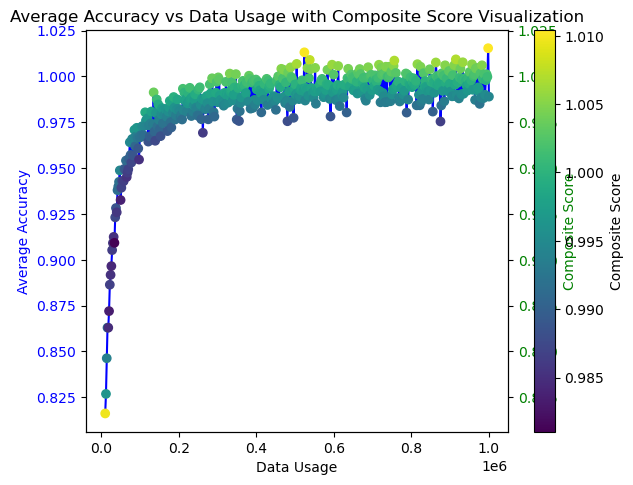

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
k = 3000  # Constant for data efficiency
w_a = 0.6  # Weight for accuracy
w_d = 0.4  # Weight for data efficiency
n = 40  # Number of languages

# Example baseline accuracies for each language
baseline_accuracies = np.random.uniform(0.6324368170257361, 0.6324368170257361, n)  # Baseline accuracies between 0.4 and 0.6

# Define the range for data usage
data_usage_range = np.linspace(10000, 1000000, 500)  # Data usage values from 1,000 to 100,000

# Initialize lists to store scores
accuracy_scores = []
data_scores = []
composite_scores = []

for D in data_usage_range:
    # Simulate accuracies for each language based on data usage
    accuracies = baseline_accuracies + (1 - baseline_accuracies) * (D / (D + 10000)) * np.random.uniform(0.8, 1.2, n)
    
    # Calculate average accuracy score
    accuracy_score = np.mean(accuracies / baseline_accuracies)
    accuracy_score = np.mean(accuracies)
    
    # Calculate data score
    data_score = D / (D + k)
    
    # Calculate composite score
    composite_score = w_a * accuracy_score + w_d * (1 / data_score)
    
    # Append the scores to lists
    accuracy_scores.append(accuracy_score)
    data_scores.append(data_score)
    composite_scores.append(composite_score)

# Convert lists to numpy arrays for easier manipulation
accuracy_scores = np.array(accuracy_scores)
data_scores = np.array(data_scores)
composite_scores = np.array(composite_scores)

# Plotting
fig, ax1 = plt.subplots()

# Plot accuracy on y-axis and data usage on x-axis
ax1.plot(data_usage_range, accuracy_scores, label='Avg Accuracy', color='blue')
ax1.set_xlabel('Data Usage')
ax1.set_ylabel('Average Accuracy', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis to show composite score using color
ax2 = ax1.twinx()
sc = ax2.scatter(data_usage_range, accuracy_scores, c=composite_scores, cmap='viridis', label='Composite Score')
ax2.set_ylabel('Composite Score', color='green')
ax2.tick_params(axis='y', labelcolor='green')
fig.colorbar(sc, ax=ax2, label='Composite Score')

# Show plot
fig.tight_layout()
plt.title('Average Accuracy vs Data Usage with Composite Score Visualization')
plt.show()


In [9]:
accuracy_scores[0], data_scores[0], composite_scores[0]

(1.086444056776282, 0.009900990099009901, 51.04322202838814)

In [10]:
accuracy_scores[1], data_scores[1], composite_scores[1]

(1.0993697424907787, 0.011842053150619827, 42.77209289800124)

In [11]:
accuracy_scores[2], data_scores[2], composite_scores[2]

(1.1121258648466248, 0.013775520287764095, 36.85233265982647)